In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data



In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option("display.max_columns", None)

In [4]:
pd.json_normalize(data['status'])


,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-02-21T06:32:25.584Z,0,None,150,25,None,8830


In [5]:
df= pd.json_normalize(data['data'])

df['timestamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10823,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963354e+07,19633537,False,NaN,1,NaN,NaN,NaN,2024-02-21T06:30:00.000Z,51857.493912,3.152104e+10,43.8447,-0.165882,-0.145030,4.496892,26.370031,18.883457,38.939059,1.018146e+12,51.6271,1.089007e+12,NaN,2024-02-21T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:32:32.704164
1,1027,Ethereum,ETH,ethereum,8436,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201629e+08,120162904.732011,True,NaN,2,NaN,NaN,NaN,2024-02-21T06:30:00.000Z,2973.421252,2.028513e+10,34.6709,-0.857100,1.431602,12.318869,22.786824,29.828932,44.199898,3.572949e+11,18.1198,3.572949e+11,NaN,2024-02-21T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:32:32.704164
2,825,Tether USDt,USDT,tether,75019,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.781829e+10,100600078701.916351,True,NaN,3,NaN,NaN,NaN,2024-02-21T06:28:00.000Z,1.000001,6.461562e+10,26.8750,-0.002186,0.020673,-0.077503,0.093809,-0.064293,-0.028087,9.781835e+10,4.9607,1.006001e+11,NaN,2024-02-21T06:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-21 09:32:32.704164
3,1839,BNB,BNB,bnb,2070,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495439e+08,149543892.185532,False,NaN,4,NaN,NaN,NaN,2024-02-21T06:29:00.000Z,353.402006,1.382215e+09,5.3591,-0.515334,-1.026894,8.215340,11.414214,31.706699,50.753071,5.284911e+10,2.6798,5.284911e+10,NaN,2024-02-21T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:32:32.704164
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.408403e+08,570041252.460805,True,NaN,5,NaN,NaN,NaN,2024-02-21T06:30:00.000Z,106.503218,2.591326e+09,32.9526,-0.091837,-3.727774,-5.408001,18.831613,11.198250,83.679809,4.695091e+10,2.3807,6.071123e+10,NaN,2024-02-21T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:32:32.704164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,25842,Marswap,MSWAP,marswap,1,2023-05-24T03:51:28.000Z,[],1.000000e+12,0.000000e+00,1000000000000,False,NaN,4996,1.000000e+12,1.916517e+06,NaN,2024-02-21T06:30:00.000Z,0.000002,6.438822e+03,50.4408,0.000000,-8.462342,10.391868,-3.184003,-40.419767,-72.876337,0.000000e+00,0.0000,1.916517e+06,NaN,2024-02-21T06:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0x4bE2b2C45b432BA362f198c08094017b61E3BDc6,2024-02-21 09:32:32.704164
4996,23659,Nucleon,XCFX,nucleon-,4,2023-02-26T01:27:27.000Z,[],1.104623e+07,0.000000e+00,11046232.147804,False,NaN,4997,1.104623e+07,2.996840e+06,NaN,2024-02-21T06:30:00.000Z,0.271300,6.438411e+03,-22.1625,-0.746001,-6.484868,7.384001,33.932340,33.769670,61.620615,0.000000e+00,0.0000,2.996840e+06,NaN,2024-02-21T06:30:00.000Z,7334.0,Conflux,CFX,conflux-network,0x889138644274a7dc602f25a7e7d53ff40e6d0091,2024-02-21 09:32:32.704164
4997,20792,Ramestta,RAMA,ramestta,2,2022-06-28T08:36:22.000Z,[],NaN,0.000000e+00,1000000000,False,NaN,4998,NaN,NaN,NaN,2024-02-21T06:30:00.000Z,0.202008,6.434191e+03,91.0785,-0.001587,-3.779630,-15.903262,-62.204941,68.437545,97.977479,0.000000e+00,0.0000,2.020077e+08,NaN,2024-02-21T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,202

In [6]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10823,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963354e+07,19633537,False,NaN,1,NaN,NaN,NaN,2024-02-21T06:30:00.000Z,51857.493912,3.152104e+10,43.8447,-0.165882,-0.145030,4.496892,26.370031,18.883457,38.939059,1.018146e+12,51.6271,1.089007e+12,NaN,2024-02-21T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:32:32.704164
1,1027,Ethereum,ETH,ethereum,8436,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201629e+08,120162904.732011,True,NaN,2,NaN,NaN,NaN,2024-02-21T06:30:00.000Z,2973.421252,2.028513e+10,34.6709,-0.857100,1.431602,12.318869,22.786824,29.828932,44.199898,3.572949e+11,18.1198,3.572949e+11,NaN,2024-02-21T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:32:32.704164
2,825,Tether USDt,USDT,tether,75019,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.781829e+10,100600078701.916351,True,NaN,3,NaN,NaN,NaN,2024-02-21T06:28:00.000Z,1.000001,6.461562e+10,26.8750,-0.002186,0.020673,-0.077503,0.093809,-0.064293,-0.028087,9.781835e+10,4.9607,1.006001e+11,NaN,2024-02-21T06:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-21 09:32:32.704164
3,1839,BNB,BNB,bnb,2070,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495439e+08,149543892.185532,False,NaN,4,NaN,NaN,NaN,2024-02-21T06:29:00.000Z,353.402006,1.382215e+09,5.3591,-0.515334,-1.026894,8.215340,11.414214,31.706699,50.753071,5.284911e+10,2.6798,5.284911e+10,NaN,2024-02-21T06:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:32:32.704164
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.408403e+08,570041252.460805,True,NaN,5,NaN,NaN,NaN,2024-02-21T06:30:00.000Z,106.503218,2.591326e+09,32.9526,-0.091837,-3.727774,-5.408001,18.831613,11.198250,83.679809,4.695091e+10,2.3807,6.071123e+10,NaN,2024-02-21T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:32:32.704164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,25842,Marswap,MSWAP,marswap,1,2023-05-24T03:51:28.000Z,[],1.000000e+12,0.000000e+00,1000000000000,False,NaN,4996,1.000000e+12,1.916517e+06,NaN,2024-02-21T06:30:00.000Z,0.000002,6.438822e+03,50.4408,0.000000,-8.462342,10.391868,-3.184003,-40.419767,-72.876337,0.000000e+00,0.0000,1.916517e+06,NaN,2024-02-21T06:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0x4bE2b2C45b432BA362f198c08094017b61E3BDc6,2024-02-21 09:32:32.704164
4996,23659,Nucleon,XCFX,nucleon-,4,2023-02-26T01:27:27.000Z,[],1.104623e+07,0.000000e+00,11046232.147804,False,NaN,4997,1.104623e+07,2.996840e+06,NaN,2024-02-21T06:30:00.000Z,0.271300,6.438411e+03,-22.1625,-0.746001,-6.484868,7.384001,33.932340,33.769670,61.620615,0.000000e+00,0.0000,2.996840e+06,NaN,2024-02-21T06:30:00.000Z,7334.0,Conflux,CFX,conflux-network,0x889138644274a7dc602f25a7e7d53ff40e6d0091,2024-02-21 09:32:32.704164
4997,20792,Ramestta,RAMA,ramestta,2,2022-06-28T08:36:22.000Z,[],NaN,0.000000e+00,1000000000,False,NaN,4998,NaN,NaN,NaN,2024-02-21T06:30:00.000Z,0.202008,6.434191e+03,91.0785,-0.001587,-3.779630,-15.903262,-62.204941,68.437545,97.977479,0.000000e+00,0.0000,2.020077e+08,NaN,2024-02-21T06:30:00.000Z,NaN,NaN,NaN,NaN,NaN,202

In [10]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df_append = pd.DataFrame(df2)
    # df = pd.concat([df2,df_append])
    
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Emmanuel\OneDrive\Documents\New folder\API.csv'):
        df.to_csv(r'C:\Users\Emmanuel\OneDrive\Documents\New folder\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Emmanuel\OneDrive\Documents\New folder\API.csv', mode='a', header=False)

In [11]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [14]:
df4 = pd.read_csv(r'C:\Users\Emmanuel\OneDrive\Documents\New folder\API.csv')
df4

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10823,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.963354e+07,1.963354e+07,False,NaN,1,NaN,NaN,NaN,2024-02-21T06:50:00.000Z,51711.582036,3.154275e+10,44.8216,-0.247570,-0.462349,4.268409,25.511175,18.461177,38.620362,1.015281e+12,51.6213,1.085943e+12,NaN,2024-02-21T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:50:58.755997
1,1,1027,Ethereum,ETH,ethereum,8436,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201629e+08,1.201629e+08,True,NaN,2,NaN,NaN,NaN,2024-02-21T06:50:00.000Z,2953.048334,2.045156e+10,36.9518,-0.833263,0.681464,11.679213,21.535122,28.651859,43.279647,3.548469e+11,18.0419,3.548469e+11,NaN,2024-02-21T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:50:58.755997
2,2,825,Tether USDt,USDT,tether,75019,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.781829e+10,1.006001e+11,True,NaN,3,NaN,NaN,NaN,2024-02-21T06:49:00.000Z,0.999910,6.477850e+10,27.7695,-0.013772,0.015804,-0.068261,0.091087,-0.069621,-0.021554,9.780951e+10,4.9731,1.005910e+11,NaN,2024-02-21T06:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-21 09:50:58.755997
3,3,1839,BNB,BNB,bnb,2070,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495439e+08,1.495439e+08,False,NaN,4,NaN,NaN,NaN,2024-02-21T06:49:00.000Z,352.693977,1.387397e+09,5.4786,-0.482480,-1.401331,7.854895,10.904303,31.761873,50.421773,5.274323e+10,2.6811,5.274323e+10,NaN,2024-02-21T06:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:50:58.755997
4,4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.408403e+08,5.700413e+08,True,NaN,5,NaN,NaN,NaN,2024-02-21T06:50:00.000Z,105.644037,2.599897e+09,33.8311,-0.552894,-4.629426,-6.201248,17.521429,9.716234,82.444817,4.657215e+10,2.3674,6.022146e+10,NaN,2024-02-21T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:50:58.755997
5,5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.455860e+10,9.998790e+10,False,NaN,6,NaN,NaN,NaN,2024-02-21T06:50:00.000Z,0.549839,1.560271e+09,17.1500,-0.594057,-3.154277,5.186772,1.838226,-10.802267,-9.505566,2.999845e+10,1.5249,5.498392e+10,NaN,2024-02-21T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:50:58.755997
6,6,3408,USDC,USDC,usd-coin,16780,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.802946e+10,2.802946e+10,False,NaN,7,NaN,NaN,NaN,2024-02-21T06:50:00.000Z,1.000016,6.751469e+09,19.6443,0.001346,0.009513,-0.005533,0.003671,-0.020432,0.007484,2.802991e+10,1.4249,2.802991e+10,NaN,2024-02-21T06:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-21 09:50:58.755997
7,7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.546076e+10,3.664248e+10,False,NaN,8,NaN,NaN,NaN,2024-02-21T06:49:00.000Z,0.599495,7.114580e+08,-1.1831,-0.701553,-5.252296,9.037323,19.793394,-1.248151,57.540584,2.125856e+10,1.0807,2.697729e+10,NaN,2024-02-21T06:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:50:58.755997
8,8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrow

In [17]:
#To remove the scientific notation

pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [18]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10823,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19633537.00000,19633537.00000,False,NaN,1,NaN,NaN,None,2024-02-21T06:51:00.000Z,51685.24443,31548535579.37927,44.88710,-0.31364,-0.50020,4.20677,25.45726,18.42829,38.55495,1014764158914.59912,51.59500,1085390133077.21997,None,2024-02-21T06:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:52:00.030548
1,1027,Ethereum,ETH,ethereum,8436,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120162904.73201,120162904.73201,True,NaN,2,NaN,NaN,None,2024-02-21T06:51:00.000Z,2950.22380,20460089446.26110,37.04390,-0.96077,0.63465,11.60560,21.43120,28.56324,43.15291,354507461372.30164,18.02470,354507461372.29999,None,2024-02-21T06:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:52:00.030548
2,825,Tether USDt,USDT,tether,75019,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97818291517.11946,100600078701.91635,True,NaN,3,NaN,NaN,None,2024-02-21T06:50:00.000Z,0.99997,64785104839.71733,27.88230,-0.01491,0.01971,-0.06348,0.09647,-0.07610,-0.02626,97814947096.58757,4.97330,100596639171.71001,None,2024-02-21T06:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-21 09:52:00.030548
3,1839,BNB,BNB,bnb,2070,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149543892.18553,149543892.18553,False,NaN,4,NaN,NaN,None,2024-02-21T06:50:00.000Z,352.68321,1388136112.73358,5.55150,-0.48602,-1.40375,7.85428,10.90695,31.79269,50.38929,52741620266.53374,2.68100,52741620266.53000,None,2024-02-21T06:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:52:00.030548
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,440840271.00787,570041252.46081,True,NaN,5,NaN,NaN,None,2024-02-21T06:51:00.000Z,105.60552,2601031573.62546,33.96600,-0.61559,-4.66324,-6.22588,17.48019,9.70159,82.36936,46555164801.46140,2.36660,60199501264.42000,None,2024-02-21T06:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:52:00.030548
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54558598490.00000,99987895338.00000,False,NaN,6,NaN,NaN,None,2024-02-21T06:51:00.000Z,0.54968,1561764244.15586,17.27860,-0.64047,-3.19149,5.15333,1.81106,-10.82961,-9.53231,29989915662.62490,1.52450,54968266217.69000,None,2024-02-21T06:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-21 09:52:00.030548
6,3408,USDC,USDC,usd-coin,16780,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28029464674.65005,28029464674.65005,False,NaN,7,NaN,NaN,None,2024-02-21T06:51:00.000Z,1.00000,6754525632.57255,19.69010,0.00030,0.00524,-0.00680,0.00391,-0.01012,0.00859,28029491488.45702,1.42480,28029491488.46000,None,2024-02-21T06:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-21 09:52:00.030548
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35460761183.31500,36642477256.53000,False,NaN,8,NaN,NaN,None,2024-02-21T06:50:00.000Z,0.59939,711071606.71585,-1.20420,-0.71303,-5.22584,9.00946,19.78582,-1.27184,57.49618,21254923830.14339,1.08050,26972674596.91000,None,2024-02-21T06:50:00.00

In [20]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.31364,-0.50020,4.20677,25.45726,18.42829,38.55495
Ethereum,-0.96077,0.63465,11.60560,21.43120,28.56324,43.15291
Tether USDt,-0.01491,0.01971,-0.06348,0.09647,-0.07610,-0.02626
BNB,-0.48602,-1.40375,7.85428,10.90695,31.79269,50.38929
Solana,-0.61559,-4.66324,-6.22588,17.48019,9.70159,82.36936
XRP,-0.64047,-3.19149,5.15333,1.81106,-10.82961,-9.53231
USDC,0.00030,0.00524,-0.00680,0.00391,-0.01012,0.00859
Cardano,-0.71303,-5.22584,9.00946,19.78582,-1.27184,57.49618
Avalanche,-0.63042,-4.92885,-5.51484,16.48399,-17.51093,77.92443


In [21]:
df5= df3.stack()
df5

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.31364
         quote.USD.percent_change_24h   -0.50020
         quote.USD.percent_change_7d     4.20677
         quote.USD.percent_change_30d   25.45726
         quote.USD.percent_change_60d   18.42829
                                          ...   
Toncoin  quote.USD.percent_change_24h   -4.51976
         quote.USD.percent_change_7d     0.54721
         quote.USD.percent_change_30d   -1.26595
         quote.USD.percent_change_60d   -2.89953
         quote.USD.percent_change_90d   -8.94653
Length: 90, dtype: float64

In [23]:
#Method 2

df5.T

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.31364
         quote.USD.percent_change_24h   -0.50020
         quote.USD.percent_change_7d     4.20677
         quote.USD.percent_change_30d   25.45726
         quote.USD.percent_change_60d   18.42829
                                          ...   
Toncoin  quote.USD.percent_change_24h   -4.51976
         quote.USD.percent_change_7d     0.54721
         quote.USD.percent_change_30d   -1.26595
         quote.USD.percent_change_60d   -2.89953
         quote.USD.percent_change_90d   -8.94653
Length: 90, dtype: float64

In [24]:
type(df5)

pandas.core.series.Series

In [25]:
df6= df5.to_frame(name='values')
df6

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.31364
        quote.USD.percent_change_24h -0.50020
        quote.USD.percent_change_7d   4.20677
        quote.USD.percent_change_30d 25.45726
        quote.USD.percent_change_60d 18.42829
...                                       ...
Toncoin quote.USD.percent_change_24h -4.51976
        quote.USD.percent_change_7d   0.54721
        quote.USD.percent_change_30d -1.26595
        quote.USD.percent_change_60d -2.89953
        quote.USD.percent_change_90d -8.94653

[90 rows x 1 columns]

In [26]:
type(df6)

pandas.core.frame.DataFrame

In [27]:
df6.count()

values    90
dtype: int64

In [29]:
index = pd.Index(range(90))

df7= df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.31364
1,Bitcoin,quote.USD.percent_change_24h,-0.50020
2,Bitcoin,quote.USD.percent_change_7d,4.20677
3,Bitcoin,quote.USD.percent_change_30d,25.45726
4,Bitcoin,quote.USD.percent_change_60d,18.42829
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-4.51976
86,Toncoin,quote.USD.percent_change_7d,0.54721
87,Toncoin,quote.USD.percent_change_30d,-1.26595
88,Toncoin,quote.USD.percent_change_60d,-2.89953


In [36]:
df8 = df7.rename(columns={'level_1' : 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.31364
1,Bitcoin,quote.USD.percent_change_24h,-0.50020
2,Bitcoin,quote.USD.percent_change_7d,4.20677
3,Bitcoin,quote.USD.percent_change_30d,25.45726
4,Bitcoin,quote.USD.percent_change_60d,18.42829
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-4.51976
86,Toncoin,quote.USD.percent_change_7d,0.54721
87,Toncoin,quote.USD.percent_change_30d,-1.26595
88,Toncoin,quote.USD.percent_change_60d,-2.89953


In [37]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h', '7d', '30d','60d', '90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.31364
1,Bitcoin,24h,-0.50020
2,Bitcoin,7d,4.20677
3,Bitcoin,30d,25.45726
4,Bitcoin,60d,18.42829
...,...,...,...
85,Toncoin,24h,-4.51976
86,Toncoin,7d,0.54721
87,Toncoin,30d,-1.26595
88,Toncoin,60d,-2.89953


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Emmanuel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


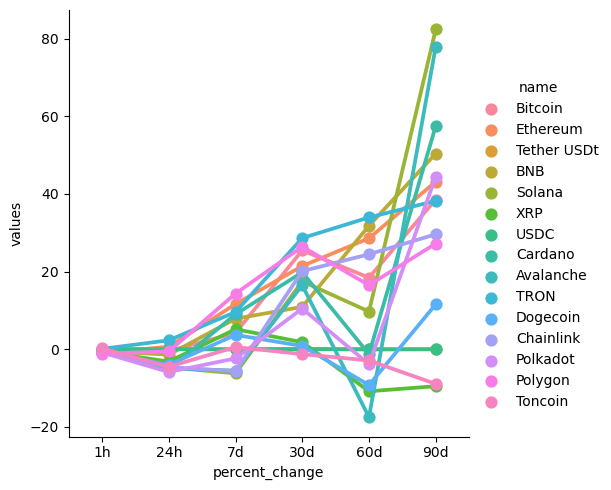

In [40]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [46]:
df9 =df4[['name','quote.USD.price','Timestamp']] 
df9 =df9.query("name =='Bitcoin'")
df9

,name,quote.USD.price,Timestamp
0,Bitcoin,51711.58204,2024-02-21 09:50:58.755997
15,Bitcoin,51685.24443,2024-02-21 09:52:00.030548


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

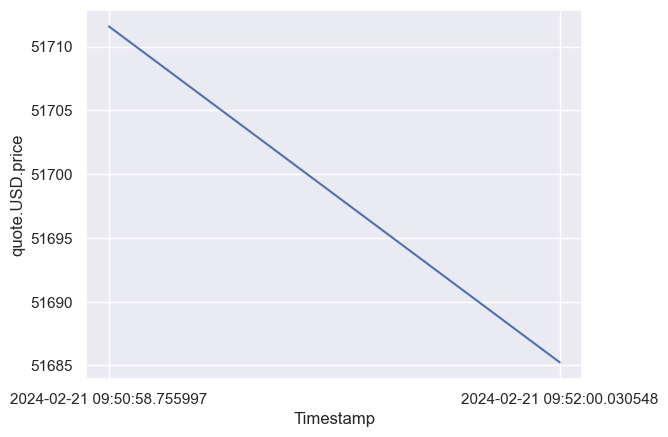

In [48]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='Timestamp',y='quote.USD.price', data=df9)
